##### Step 1 - Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

##### Step 2 - Import data and create a pandas dataframe

In [2]:
df = pd.read_csv(r'data/marketing-data.csv')

### PREPROCESS

##### Step 3 - Get general information of the dataset

In [3]:
# Use the head() method to display the first few rows of the data.
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [4]:
# Use the tail() method to display the last few rows of the data.
df.tail()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,NaN,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium
4999,CAM5000,TV,Automotive,Sabah,476378.0,261529.0,308009.000,45922.0,0.5187,3047.0,0.0438,146303.0,0.770000,330.0,1/1/2023,6/11/2023,1.0,1.0,High


In [5]:
#Use the info() method to display the data types of each column.
#This will give us the name and number of columns, the number of rows and the data type of each column.
#We see here that we are working with 19 columns and 5000 rows, consisting of integers, floats, and objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [6]:
#Use the shape attribute to display the number of rows and columns in the data.
df.shape

(5000, 19)

##### Step 4 - Data cleansing

"Data cleansing or data cleaning is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset, table, or database. It involves detecting incomplete, incorrect, or inaccurate parts of the data and then replacing, modifying, or deleting the affected data." Wu, S. (2013)

In [7]:
#Use the duplicated() method to count the number of duplicate rows in the data.
#We see that there are no duplicate rows in the data.
duplicated = df.duplicated().sum()
int(duplicated)

0

In [8]:
#Use isnull() and sum() methods to count the number of missing values in each column.
isnull = df.isnull().sum()
isnull

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

<Axes: >

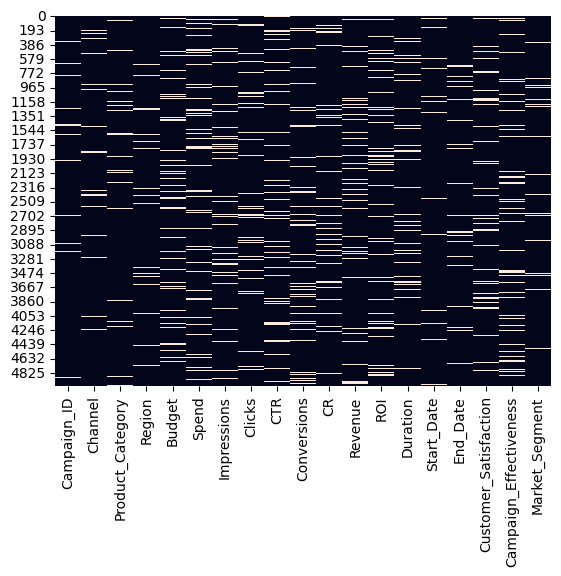

In [9]:
#Use a heatmap to visualize the missing values in the data.
sns.heatmap(df.isnull(), cbar=False)

In [10]:
#Use the isnull() and sum() methods to calculate the percentage of missing values in each column. 
#This will tell us if there are any columns with a high percentage of missing values.
#As a rule of thumb, columns with more than 30% missing values are usually removed from the data. 
df.isnull().sum() / df.shape[0] * 100

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

#### Fix the null values

In [23]:
#Since the campaign_id column follows a pattern, we can fill in the missing values easily.
df['Campaign_ID'].fillna(df.index.to_series().apply(lambda x: f'CAM{x+1:04d}'), inplace=True)

In [24]:
#As we can see, the missing values in the Campaign_ID column have been filled in and there are no missing values in the column.
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64